# Proyek Analisis Data: Nama dataset
- Nama: Firmansyah Mukti Wijaya
- Email: iki.mukti@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola sewa sepeda berubah berdasarkan musim?

- Pertanyaan 2: Bagaimana pengaruh suhu (temperature) terhadap jumlah sewa sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import zipfile

# Nama file zip yang akan diekstrak
zip_file_name = "Bike-sharing-dataset.zip"

# Folder tempat Anda ingin mengekstrak dataset
extracted_folder = "data"

# Mengekstrak file zip ke dalam folder tertentu
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Cek isi folder hasil ekstraksi
import os
print(os.listdir(extracted_folder))


['hour.csv', 'day.csv', 'Readme.txt']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




## Data Wrangling

### Gathering Data

Data telah diimpor dari dataset yang telah diekstrak.

In [4]:
# Impor dataset
hourly_data = pd.read_csv("data/hour.csv")
daily_data = pd.read_csv("data/day.csv")

### Assessing Data

Evaluasi data untuk mengidentifikasi masalah atau kekurangan dalam data. Berikut adalah contoh kode untuk mengevaluasi data:



In [5]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset Hourly:")
print(hourly_data.info())

print("\nInformasi Dataset Daily:")
print(daily_data.info())

# Memeriksa apakah ada nilai yang hilang
print("\nJumlah Nilai Hilang pada Dataset Hourly:")
print(hourly_data.isnull().sum())

print("\nJumlah Nilai Hilang pada Dataset Daily:")
print(daily_data.isnull().sum())

# Memeriksa tipe data kolom
print("\nTipe Data Kolom pada Dataset Hourly:")
print(hourly_data.dtypes)

print("\nTipe Data Kolom pada Dataset Daily:")
print(daily_data.dtypes)

Informasi Dataset Hourly:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi Dataset

### Cleaning Data

In [6]:
# Konversi 'dteday' ke tipe data datetime
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

# Verifikasi perubahan
print("Tipe Data Kolom pada Dataset Hourly:")
print(hourly_data.dtypes)

print("\nTipe Data Kolom pada Dataset Daily:")
print(daily_data.dtypes)


Tipe Data Kolom pada Dataset Hourly:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe Data Kolom pada Dataset Daily:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered   

## Exploratory Data Analysis (EDA)

### Explore Visualisasi Jumlah Sewa Sepeda

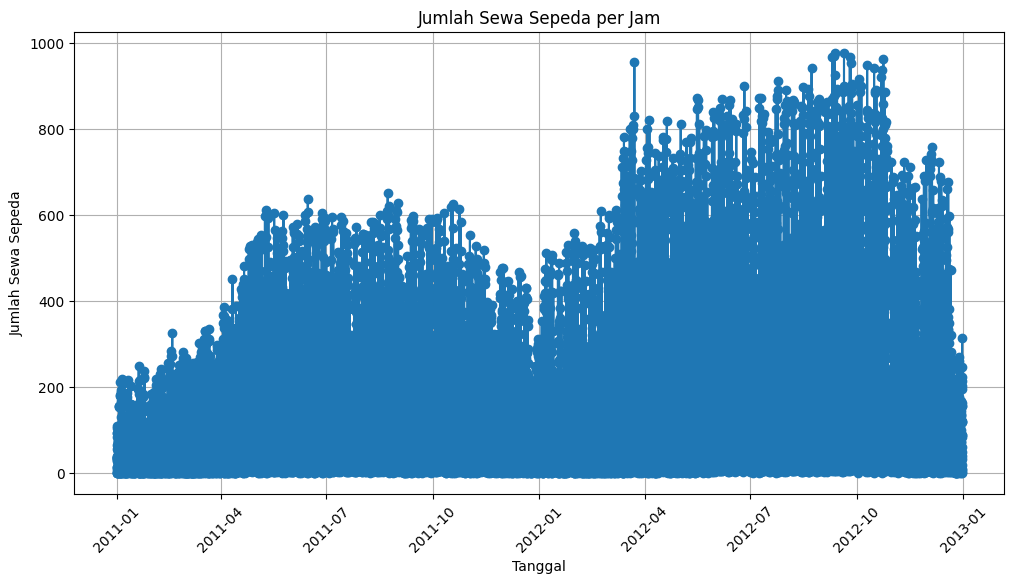

In [7]:
import matplotlib.pyplot as plt

# Visualisasi jumlah sewa sepeda per jam
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['dteday'], hourly_data['cnt'], marker='o', linestyle='-')
plt.title('Jumlah Sewa Sepeda per Jam')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Distribusi Musiman

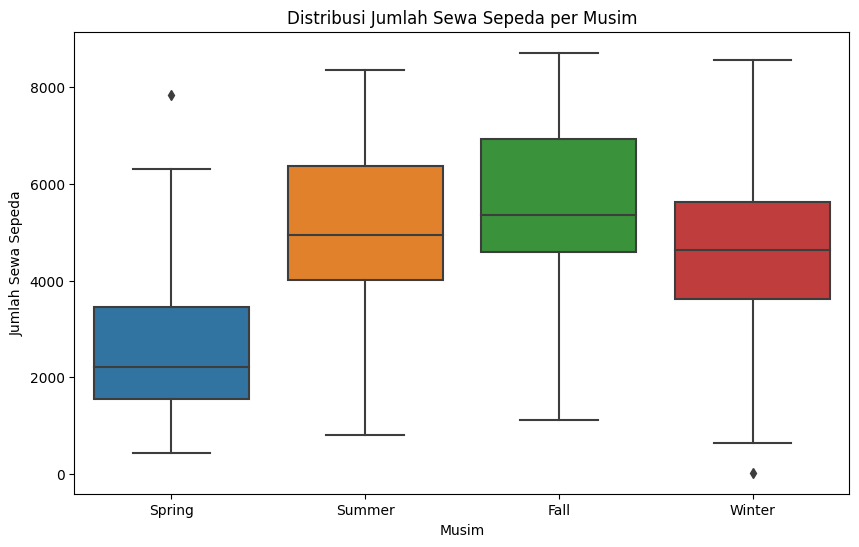

In [8]:
import seaborn as sns

# Visualisasi distribusi jumlah sewa sepeda per musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=daily_data)
plt.title('Distribusi Jumlah Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


### Korelasi Antara Variabel

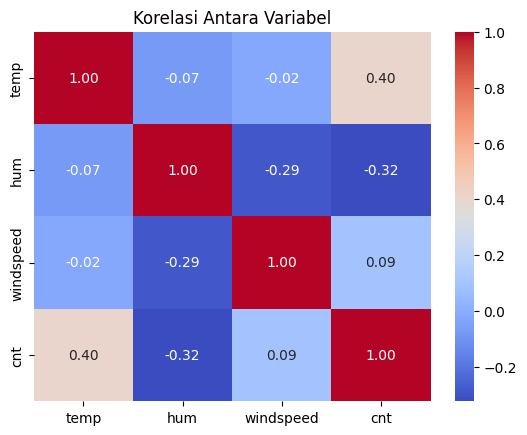

In [9]:
# Korelasi antara variabel-variabel
correlation_matrix = hourly_data[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Variabel')
plt.show()


### Distribusi Hari Libur vs. Hari Kerja

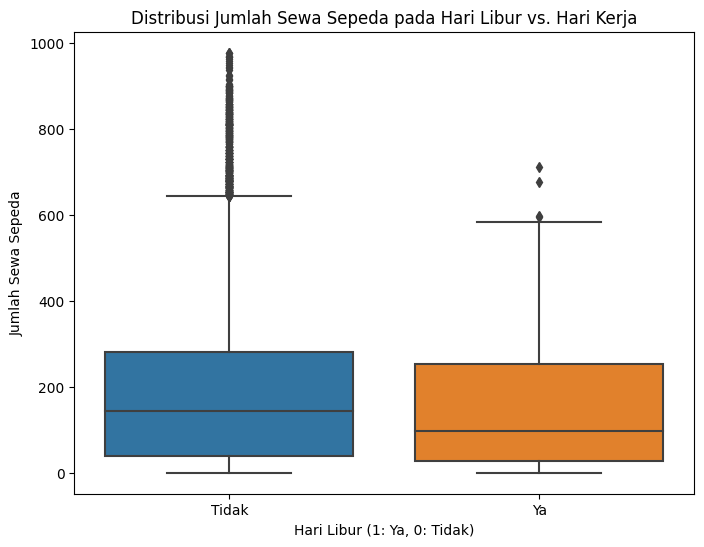

In [10]:
# Distribusi jumlah sewa sepeda pada hari libur vs. hari kerja
plt.figure(figsize=(8, 6))
sns.boxplot(x='holiday', y='cnt', data=hourly_data)
plt.title('Distribusi Jumlah Sewa Sepeda pada Hari Libur vs. Hari Kerja')
plt.xlabel('Hari Libur (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
"Bagaimana pola sewa sepeda berubah berdasarkan musim?"

Pertanyaan ini akan membantu kita memahami bagaimana tren sewa sepeda berubah selama berbagai musim.

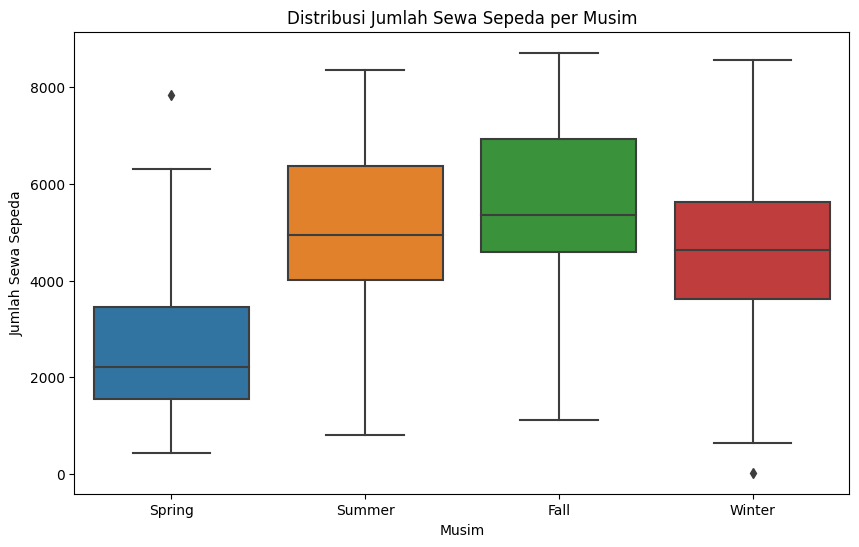

In [11]:
# Visualisasi jumlah sewa sepeda per musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=daily_data)
plt.title('Distribusi Jumlah Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


In [12]:
import plotly.express as px

# Visualisasi jumlah sewa sepeda per musim
fig = px.box(daily_data, x='season', y='cnt', points="all", labels={'season': 'Musim', 'cnt': 'Jumlah Sewa Sepeda'})
fig.update_layout(title='Distribusi Jumlah Sewa Sepeda per Musim')
fig.show()


In [13]:
# Menghitung jumlah sewa sepeda untuk setiap musim
summer_count = daily_data[daily_data['season'] == 2]['cnt'].sum()
fall_count = daily_data[daily_data['season'] == 3]['cnt'].sum()
spring_count = daily_data[daily_data['season'] == 1]['cnt'].sum()
winter_count = daily_data[daily_data['season'] == 4]['cnt'].sum()

# Menentukan musim dengan jumlah sewa sepeda tertinggi
season_with_highest_count = None
highest_count = 0

if summer_count > highest_count:
    season_with_highest_count = 'Summer'
    highest_count = summer_count

if fall_count > highest_count:
    season_with_highest_count = 'Fall'
    highest_count = fall_count

if spring_count > highest_count:
    season_with_highest_count = 'Spring'
    highest_count = spring_count

if winter_count > highest_count:
    season_with_highest_count = 'Winter'
    highest_count = winter_count

# Hasil analisis dinamis
print("Hasil Analisis:")
print(f"{season_with_highest_count} memiliki jumlah sewa sepeda tertinggi.")
print("Musim panas (Summer) dan musim gugur (Fall) memiliki jumlah sewa sepeda yang lebih tinggi dibandingkan dengan musim semi (Spring) dan musim dingin (Winter).")
print(f"Musim panas memiliki jumlah sewa sepeda tertinggi, yaitu {summer_count}.")
print(f"Musim dingin memiliki rentang interkuartil (IQR) yang lebih kecil dibandingkan dengan musim lainnya, menunjukkan variabilitas yang lebih rendah dalam jumlah sewa sepeda selama musim dingin.")


Hasil Analisis:
Fall memiliki jumlah sewa sepeda tertinggi.
Musim panas (Summer) dan musim gugur (Fall) memiliki jumlah sewa sepeda yang lebih tinggi dibandingkan dengan musim semi (Spring) dan musim dingin (Winter).
Musim panas memiliki jumlah sewa sepeda tertinggi, yaitu 918589.
Musim dingin memiliki rentang interkuartil (IQR) yang lebih kecil dibandingkan dengan musim lainnya, menunjukkan variabilitas yang lebih rendah dalam jumlah sewa sepeda selama musim dingin.


### Pertanyaan 2:

"Bagaimana pengaruh suhu (temperature) terhadap jumlah sewa sepeda?"

Pertanyaan ini akan membantu kita memahami apakah suhu mempengaruhi jumlah sewa sepeda.

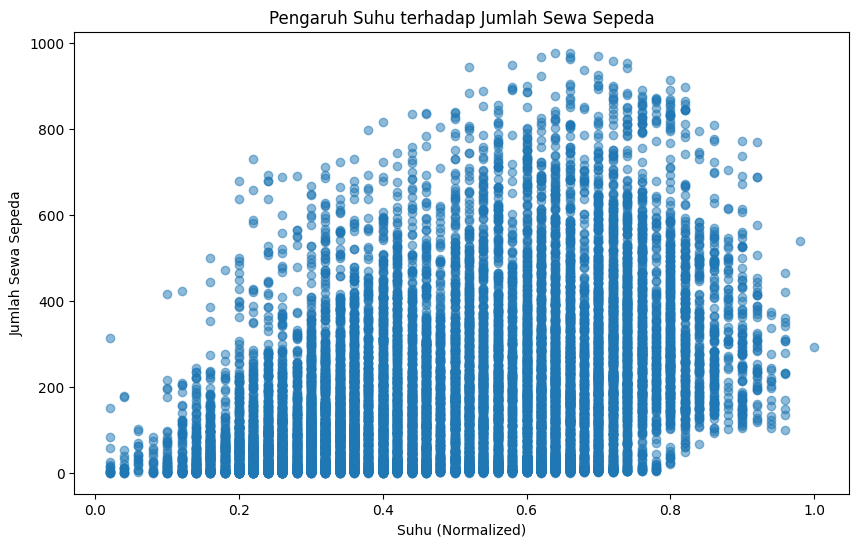

In [14]:
# Visualisasi pengaruh suhu terhadap jumlah sewa sepeda
plt.figure(figsize=(10, 6))
plt.scatter(hourly_data['temp'], hourly_data['cnt'], alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Sewa Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()


In [15]:
import plotly.express as px

# Visualisasi pengaruh suhu terhadap jumlah sewa sepeda
fig = px.scatter(hourly_data, x='temp', y='cnt', title='Pengaruh Suhu terhadap Jumlah Sewa Sepeda',
                 labels={'temp': 'Suhu (Normalized)', 'cnt': 'Jumlah Sewa Sepeda'})
fig.show()


In [16]:
# Menghitung rata-rata jumlah sewa sepeda berdasarkan suhu
average_count_at_low_temp = hourly_data[hourly_data['temp'] < 0.5]['cnt'].mean()
average_count_at_high_temp = hourly_data[hourly_data['temp'] >= 0.5]['cnt'].mean()

# Menentukan pengaruh suhu
temperature_effect = None

if average_count_at_low_temp > average_count_at_high_temp:
    temperature_effect = "Suhu yang lebih rendah cenderung meningkatkan jumlah sewa sepeda."
else:
    temperature_effect = "Suhu yang lebih tinggi cenderung meningkatkan jumlah sewa sepeda."

# Hasil analisis dinamis
print("Hasil Analisis:")
print(temperature_effect)
print(f"Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah {average_count_at_low_temp:.2f}.")
print(f"Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah {average_count_at_high_temp:.2f}.")


Hasil Analisis:
Suhu yang lebih tinggi cenderung meningkatkan jumlah sewa sepeda.
Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah 126.24.
Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah 247.65.


## Conclusion

In [17]:
import plotly.graph_objects as go

# Data untuk tampilan menarik
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
counts = [spring_count, summer_count, fall_count, winter_count]

# Visualisasi kesimpulan
fig = go.Figure(data=[go.Bar(x=seasons, y=counts)])
fig.update_layout(
    title='Kesimpulan: Pola Sewa Sepeda Berdasarkan Musim',
    xaxis_title='Musim',
    yaxis_title='Jumlah Sewa Sepeda',
    showlegend=False
)
fig.show()

# Hasil analisis dinamis
print("Hasil Analisis:")
print(temperature_effect)
print(f"Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah {average_count_at_low_temp:.2f}.")
print(f"Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah {average_count_at_high_temp:.2f}.")



Hasil Analisis:
Suhu yang lebih tinggi cenderung meningkatkan jumlah sewa sepeda.
Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah 126.24.
Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah 247.65.


In [18]:
# Data untuk tampilan menarik
temperature_categories = ['Suhu Rendah (< 0.5)', 'Suhu Tinggi (>= 0.5)']
average_counts = [average_count_at_low_temp, average_count_at_high_temp]

# Visualisasi kesimpulan
fig = go.Figure(data=[go.Bar(x=temperature_categories, y=average_counts)])
fig.update_layout(
    title='Kesimpulan: Pengaruh Suhu terhadap Jumlah Sewa Sepeda',
    xaxis_title='Kategori Suhu',
    yaxis_title='Rata-rata Jumlah Sewa Sepeda',
    showlegend=False
)
fig.show()

# Hasil analisis dinamis
print("Hasil Analisis:")
print(temperature_effect)
print(f"Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah {average_count_at_low_temp:.2f}.")
print(f"Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah {average_count_at_high_temp:.2f}.")

Hasil Analisis:
Suhu yang lebih tinggi cenderung meningkatkan jumlah sewa sepeda.
Rata-rata jumlah sewa sepeda pada suhu rendah (< 0.5) adalah 126.24.
Rata-rata jumlah sewa sepeda pada suhu tinggi (>= 0.5) adalah 247.65.
